In [20]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [22]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [23]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [24]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [25]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [26]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cd253319dd7f58f7aa42ceea2dbb3feb


In [27]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [28]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pangnirtung
Processing Record 2 of Set 1 | mount isa
Processing Record 3 of Set 1 | provideniya
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | lolua
City not found. Skipping...
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | rundu
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | chokurdakh
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | santa cruz del sur
Processing Record 15 of Set 1 | culebra
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | muroto
Processing Record 18 of Set 1 | bathsheba
Processing Record 19 of Set 1 | binabalian
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | jian
Processing Record 22 of Set 1

Processing Record 36 of Set 4 | puerto escondido
Processing Record 37 of Set 4 | cascais
Processing Record 38 of Set 4 | uberlandia
Processing Record 39 of Set 4 | burica
City not found. Skipping...
Processing Record 40 of Set 4 | kavieng
Processing Record 41 of Set 4 | nioro
Processing Record 42 of Set 4 | hami
Processing Record 43 of Set 4 | carnarvon
Processing Record 44 of Set 4 | betare oya
Processing Record 45 of Set 4 | rincon
Processing Record 46 of Set 4 | colgong
Processing Record 47 of Set 4 | tongliao
Processing Record 48 of Set 4 | richards bay
Processing Record 49 of Set 4 | birao
Processing Record 50 of Set 4 | forestville
Processing Record 1 of Set 5 | bandrele
Processing Record 2 of Set 5 | kita
Processing Record 3 of Set 5 | gat
Processing Record 4 of Set 5 | ancud
Processing Record 5 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 5 | mecca
Processing Record 7 of Set 5 | korla
Processing Record 8 of Set 5 | hamilton
Processing Record 9 o

Processing Record 26 of Set 8 | eyrarbakki
Processing Record 27 of Set 8 | saint-philippe
Processing Record 28 of Set 8 | porto velho
Processing Record 29 of Set 8 | beloha
Processing Record 30 of Set 8 | asfi
Processing Record 31 of Set 8 | katha
City not found. Skipping...
Processing Record 32 of Set 8 | nome
Processing Record 33 of Set 8 | stokmarknes
Processing Record 34 of Set 8 | veraval
Processing Record 35 of Set 8 | saleaula
City not found. Skipping...
Processing Record 36 of Set 8 | berdigestyakh
Processing Record 37 of Set 8 | gympie
Processing Record 38 of Set 8 | zhangye
Processing Record 39 of Set 8 | flin flon
Processing Record 40 of Set 8 | ostrovnoy
Processing Record 41 of Set 8 | fortuna
Processing Record 42 of Set 8 | buala
Processing Record 43 of Set 8 | aguimes
Processing Record 44 of Set 8 | la ronge
Processing Record 45 of Set 8 | chimoio
Processing Record 46 of Set 8 | samarai
Processing Record 47 of Set 8 | lata
Processing Record 48 of Set 8 | pisco
Processing 

Processing Record 13 of Set 12 | pudozh
Processing Record 14 of Set 12 | kozhanka
Processing Record 15 of Set 12 | zhezkazgan
Processing Record 16 of Set 12 | nouadhibou
Processing Record 17 of Set 12 | bereda
Processing Record 18 of Set 12 | samaghar
Processing Record 19 of Set 12 | molteno
Processing Record 20 of Set 12 | sabang
Processing Record 21 of Set 12 | baghdad
Processing Record 22 of Set 12 | shellbrook
Processing Record 23 of Set 12 | sungaipenuh
Processing Record 24 of Set 12 | villa union
Processing Record 25 of Set 12 | likasi
Processing Record 26 of Set 12 | najran
Processing Record 27 of Set 12 | nizwa
Processing Record 28 of Set 12 | neenah
Processing Record 29 of Set 12 | kaoma
Processing Record 30 of Set 12 | temir
Processing Record 31 of Set 12 | sagua la grande
Processing Record 32 of Set 12 | truth or consequences
Processing Record 33 of Set 12 | vanavara
Processing Record 34 of Set 12 | prince rupert
Processing Record 35 of Set 12 | aleksandrov gay
Processing Re

In [29]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pangnirtung,66.15,-65.71,53.60,76,20,8.05,CA,2020-08-21 21:21:15
1,Mount Isa,-20.73,139.50,59.00,28,53,9.17,AU,2020-08-21 21:19:16
2,Provideniya,64.38,-173.30,50.04,90,100,9.15,RU,2020-08-21 21:16:23
3,Ushuaia,-54.80,-68.30,44.60,70,75,17.22,AR,2020-08-21 21:19:19
4,Puerto Ayora,-0.74,-90.35,78.80,47,83,17.22,EC,2020-08-21 21:21:18
5,Bluff,-46.60,168.33,50.00,97,70,4.00,NZ,2020-08-21 21:21:19
6,Mataura,-46.19,168.86,50.00,97,76,4.00,NZ,2020-08-21 21:21:20
7,Busselton,-33.65,115.33,51.01,72,95,7.72,AU,2020-08-21 21:21:20
8,Rundu,-17.93,19.77,58.12,33,68,5.03,NA,2020-08-21 21:21:21
9,Kapaa,22.08,-159.32,82.99,69,20,12.75,US,2020-08-21 21:21:21


In [30]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [31]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pangnirtung,CA,2020-08-21 21:21:15,66.15,-65.71,53.60,76,20,8.05
1,Mount Isa,AU,2020-08-21 21:19:16,-20.73,139.50,59.00,28,53,9.17
2,Provideniya,RU,2020-08-21 21:16:23,64.38,-173.30,50.04,90,100,9.15
3,Ushuaia,AR,2020-08-21 21:19:19,-54.80,-68.30,44.60,70,75,17.22
4,Puerto Ayora,EC,2020-08-21 21:21:18,-0.74,-90.35,78.80,47,83,17.22
5,Bluff,NZ,2020-08-21 21:21:19,-46.60,168.33,50.00,97,70,4.00
6,Mataura,NZ,2020-08-21 21:21:20,-46.19,168.86,50.00,97,76,4.00
7,Busselton,AU,2020-08-21 21:21:20,-33.65,115.33,51.01,72,95,7.72
8,Rundu,NA,2020-08-21 21:21:21,-17.93,19.77,58.12,33,68,5.03
9,Kapaa,US,2020-08-21 21:21:21,22.08,-159.32,82.99,69,20,12.75


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [35]:
# Import the time module.
import time

In [36]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

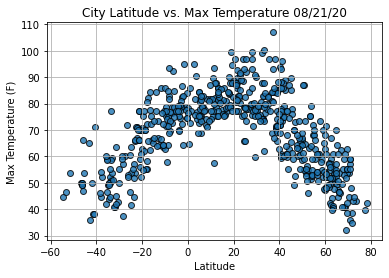

In [37]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

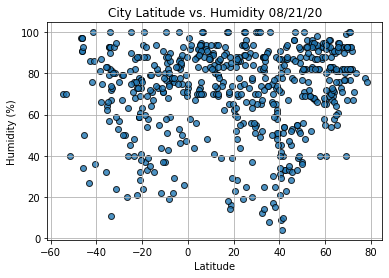

In [38]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

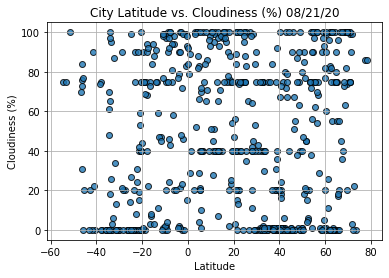

In [39]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

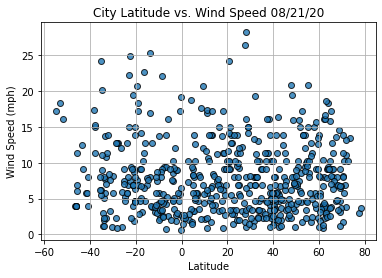

In [40]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [42]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pangnirtung,CA,2020-08-21 21:21:15,66.15,-65.71,53.60,76,20,8.05
2,Provideniya,RU,2020-08-21 21:16:23,64.38,-173.30,50.04,90,100,9.15
9,Kapaa,US,2020-08-21 21:21:21,22.08,-159.32,82.99,69,20,12.75
10,Chokurdakh,RU,2020-08-21 21:19:03,70.63,147.92,35.92,93,99,8.19
11,Santa Cruz Del Sur,CU,2020-08-21 21:21:22,20.71,-78.00,88.23,60,3,10.16
...,...,...,...,...,...,...,...,...,...
563,Raikot,IN,2020-08-21 21:30:09,30.65,75.60,79.16,70,43,3.47
565,Axim,GH,2020-08-21 21:30:14,4.87,-2.24,75.18,89,66,8.25
567,Tobe,JP,2020-08-21 21:30:16,33.74,132.79,80.01,88,40,3.36
569,Seymchan,RU,2020-08-21 21:30:18,62.88,152.43,39.74,73,100,16.60


In [76]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()

In [64]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Import Matplotlib.
import matplotlib.pyplot as plt

In [65]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

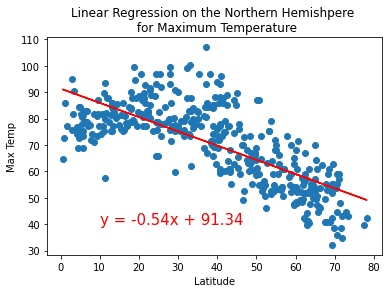

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemishpere \n for Maximum Temperature', 
                       'Max Temp', (10,40))

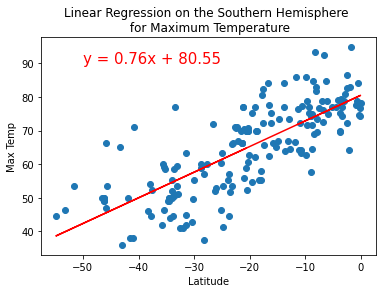

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,90))

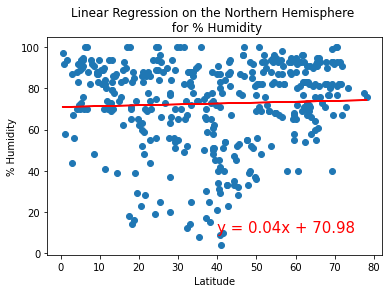

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(40,10))

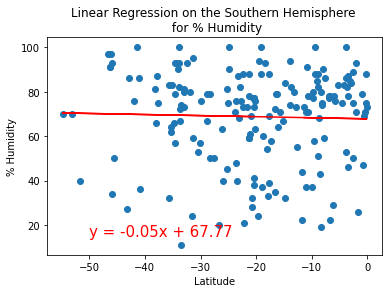

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-50,15))

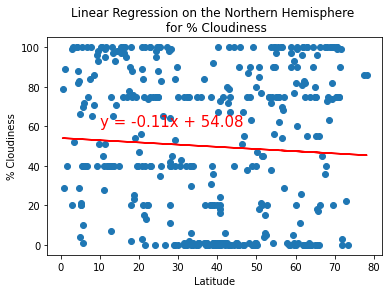

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(10,60))

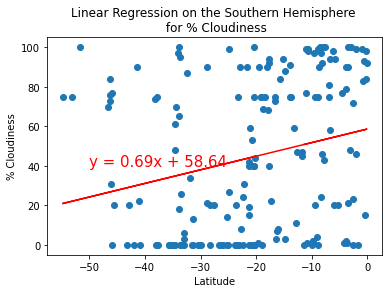

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-50,40))

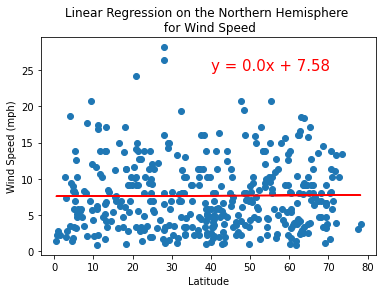

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed (mph)',(40,25))

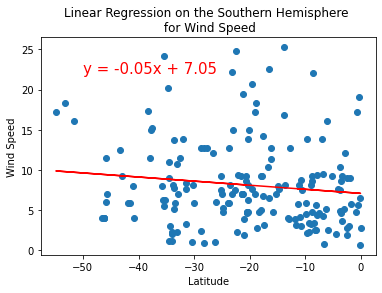

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-50,22))